In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers
import datetime
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.optimizers import RMSprop
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [5]:
my_input=layers.Input(shape=(28,28,1))

In [8]:
def encoder(input_img):
    #encoder
    l1 = Conv2D(16, (3,3),strides = 1 , activation = 'relu',padding='same')(input_img)
    l1 = MaxPooling2D((2,2))(l1)
    l1 = Conv2D(8,(3,3),strides = 1, activation='relu',padding='same')(l1)
    encoded = MaxPooling2D((2,2),padding = 'same')(l1)
    return encoded

def decoder(encoded):    
    #decoder
    l1 = Conv2DTranspose(8,(3,3),strides = 1,activation='relu',padding='same')(encoded)
    l1 = UpSampling2D((2,2))(l1)
    l1 = Conv2DTranspose(16,(3,3),strides = 1,activation='relu',padding = 'same')(l1)
    l1 = UpSampling2D((2,2))(l1)
    decoded = Conv2DTranspose(1,(3,3),strides = 1, activation='sigmoid',padding  ='same')(l1)
    return decoded

In [19]:
conv1=layers.Conv2D (64,3,activation='relu', padding='same',strides=1)(decoder(encoder(my_input)))
pool1=layers.MaxPool2D(pool_size=2)(conv1)
conv2=layers.Conv2D (64,3,activation='relu', padding='same',strides=1)(pool1)
pool2=layers.MaxPool2D(pool_size=2)(conv2)
flat=layers.Flatten()(pool2)
out=layers.Dense(10,activation = 'softmax')(flat)
autoencoder = Model(my_input, out)
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(), metrics=['accuracy'])

In [20]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 8)         0         
__________

In [21]:
autoencoder_train = autoencoder.fit(X_train, y_train, batch_size=32,epochs=5,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 209s 4ms/step - loss: 0.0297 - acc: 0.7818 - val_loss: 0.0222 - val_acc: 0.8447
Epoch 2/5
48000/48000 [==============================] - 191s 4ms/step - loss: 0.0200 - acc: 0.8613 - val_loss: 0.0196 - val_acc: 0.8647
Epoch 3/5
48000/48000 [==============================] - 191s 4ms/step - loss: 0.0181 - acc: 0.8756 - val_loss: 0.0189 - val_acc: 0.8698
Epoch 4/5
48000/48000 [==============================] - 193s 4ms/step - loss: 0.0172 - acc: 0.8825 - val_loss: 0.0175 - val_acc: 0.8808
Epoch 5/5
48000/48000 [==============================] - 196s 4ms/step - loss: 0.0162 - acc: 0.8881 - val_loss: 0.0174 - val_acc: 0.8790


In [25]:
history=autoencoder_train.history

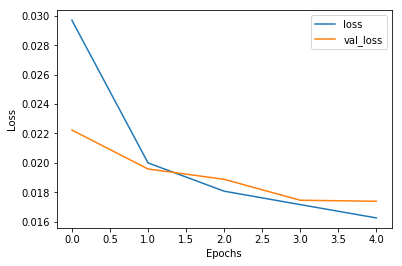

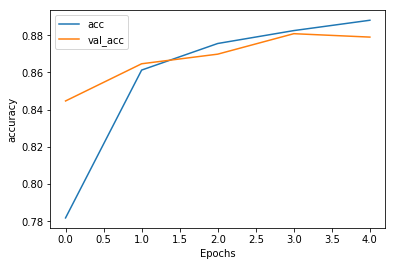

In [26]:
losses=history['loss']
val_losses=history['val_loss']
ac=history['acc']
val_ac=history['val_acc']

import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(ac)
plt.plot(val_ac)
plt.legend(['acc','val_acc'])

# =============================================================================
# 
# Evaluation
# =============================================================================



In [23]:
predicted_labels=autoencoder.predict(X_test)
#plt.imshow (test_images[0],cmap='binary')
test_loss,test_acc=autoencoder.evaluate(X_test,y_test)

10000/10000 [==============================] - 15s 1ms/step


In [27]:
print('loss = ',test_loss,'acc = ',test_acc)

loss =  0.017850303576886654 acc =  0.8772
